<a href="https://colab.research.google.com/github/sammyculotta/PHY122-Lab/blob/main/phy122_RMt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Work

Name

Date

#   <font color='Green'> **Setup** </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt, zeros, ones, array, sin, cos
from numpy import sum as Σ

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)):
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt)

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt
        a_told    = a_tnew

    return x_t, v_t, f_t

## <font color='Green'> **example** </font>

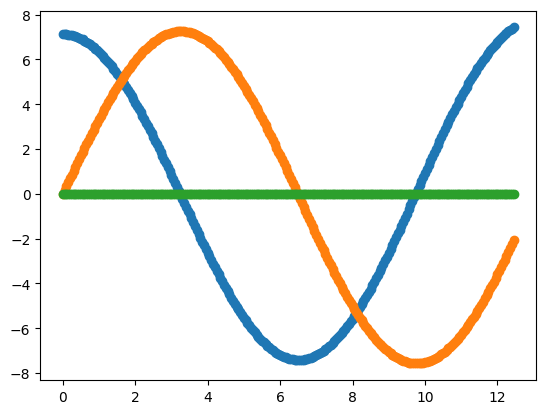

In [ ]:
t  = arange(0, 12.5, 0.05) ## time-array (collection of all time-points measured by detector)
x0 = array([7.1234,0.,0.]) ## start solely on the 0-axis
v0 = array([0.,3.4567,0.]) ## initial-velocity (needed for rotational motion) on 1-axis

x_t, v_t, f_t = VelocityVerletRot(t, x0=x0, v0=v0) ## using my method for rotational-motion (defined above)

plt.scatter(t, x_t[:,0]) ## 0-axis plot
plt.scatter(t, x_t[:,1]) ## 1-axis plot
plt.scatter(t, x_t[:,2]) ## 2-axis plot
plt.show()

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

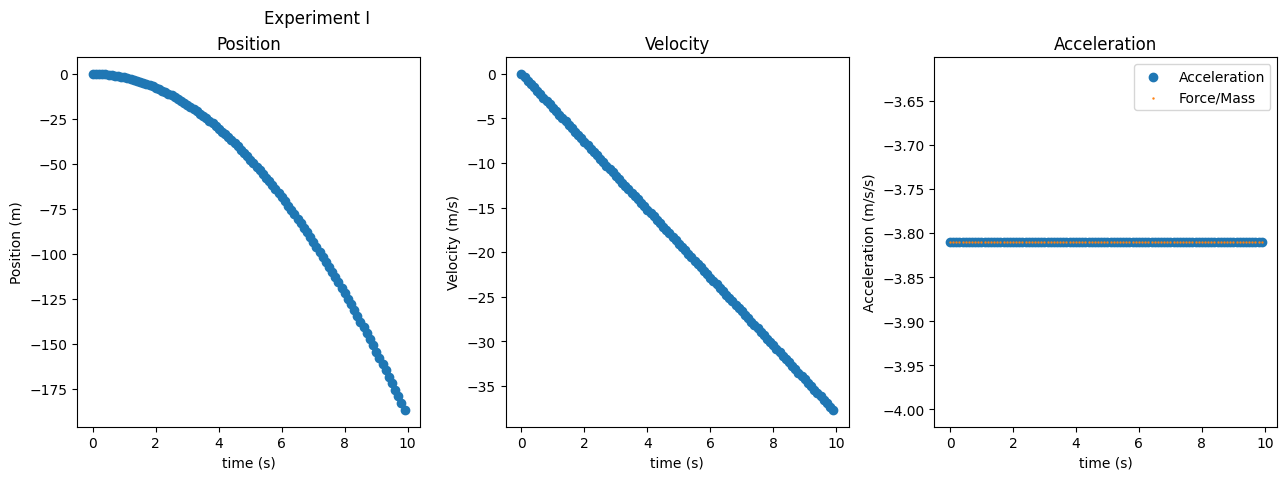

In [4]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

x_0  = array([0., 0., 0.]) ## m : initial position vector/array
v_0  = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m    =  10.00   ## kg : mass of your particle
g    = -3.81    ## m/s/s : surface-gravity

f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,0] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="Acceleration")
ax3.scatter(T, f_gravity[:,0]/m, s=0.5, label="Force/Mass")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

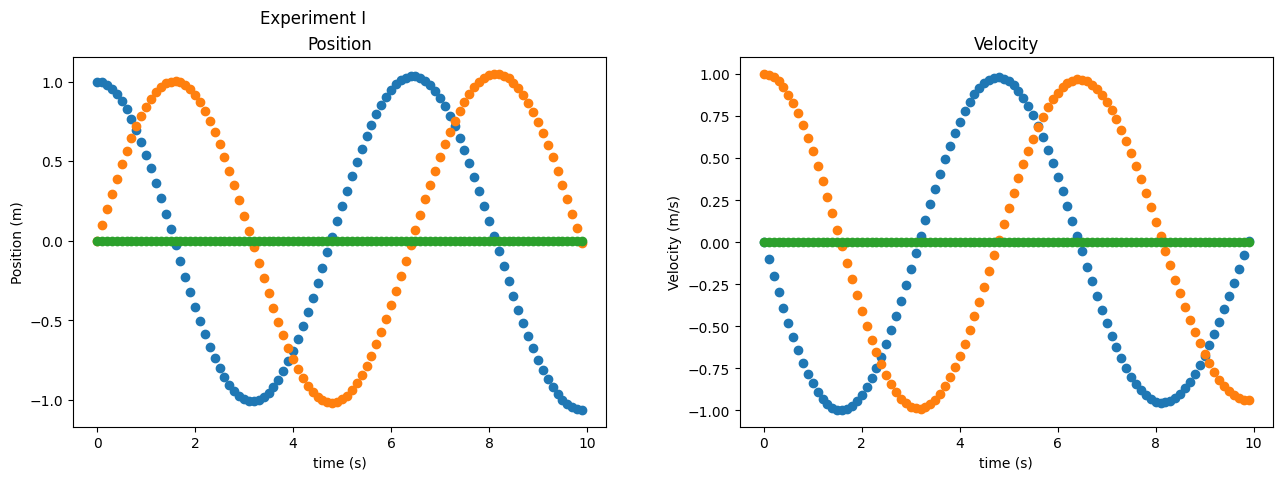

In [14]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

x_0  = array([1., 0., 0.]) ## m : initial position vector/array ensure orthogonal
v_0  = array([0., 1., 0.]) ## m/s : initial velocity vector/array ensure orthogonal
m    =  10.00   ## kg : mass of your particle

f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,0] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = -np.dot( V_tx[0], V_tx[0]) / (np.linalg.norm(R_tx[0])**2) * ( R_tx[0] - np.zeros(3) ) ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = -np.dot( V_tx[t-1], V_tx[t-1]) / (np.linalg.norm(R_tx[t])**2) * ( R_tx[t] - np.zeros(3) ) ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.scatter(T, R_tx[:,1])
ax1.scatter(T, R_tx[:,2])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.scatter(T, V_tx[:,1])
ax2.scatter(T, V_tx[:,2])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')


fig.show()

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure in include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

###   <font color='Red'> Plot a parametric plot with x and y </font>

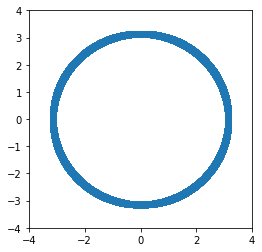

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implment the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [32]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

TT  = arange(t0, tf, dt)

v_range = np.arange(0, 3, 0.1)
f_v     = np.zeros(v_range.shape)

for i in range(len(v_range)):
  vi = v_range[i] * np.array([0., 1., 0.])
  x_t, v_t, f_t = VelocityVerletRot(TT, x0=np.array([1.,0.,0.]), v0=vi, mass=1.,)
  f = np.linalg.norm(f_t, axis=1)
  f_avg = np.sum(f)/len(f)

  f_v[i] = f_avg

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

#### <font color='Red'> Plot your data: F vs. v </font>

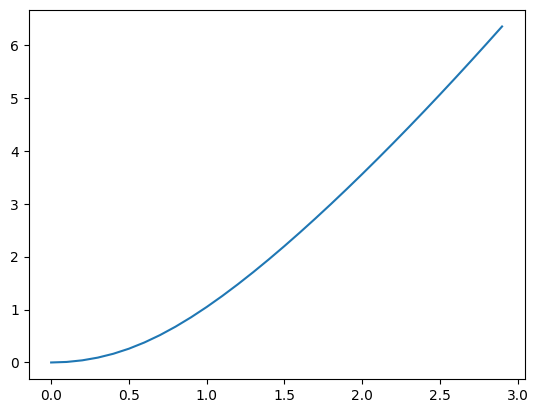

In [39]:
plt.plot(v_range, (f_v))
plt.show()

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [35]:
def linearfit(x,y):
  A = np.vstack([x, np.ones(len(x))]).T
  return np.linalg.lstsq(A, y)[0]

m, c = linearfit(v_range, np.sqrt(f_v))

print(m)

0.874328367396319


### <font color='Red'> Get the theoritical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

In [38]:
1./np.linalg.norm(np.array([1.,0.,0.]))

np.float64(1.0)

#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

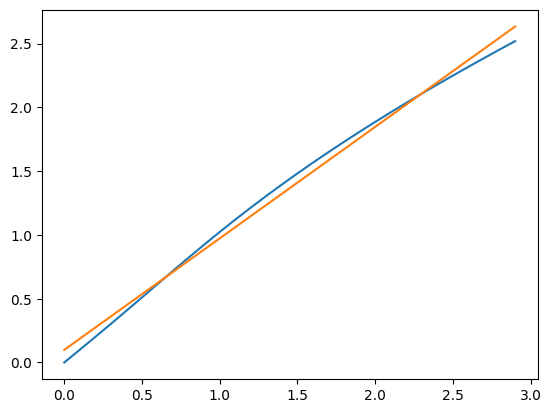

In [41]:
plt.plot(v_range, np.sqrt(f_v))
plt.plot(v_range, m*v_range + c)
plt.show()

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implment the *for-loop over object configurations*, but thiis time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

### <font color='Red'> For-loop over Radii considered </font>

### <font color='Red'> Plot the Radii vs. Force graph </font>

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

### <font color='Red'> Get the theoritical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>